In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, r2_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch



# **Load and read datset**

In [1]:
# Dataset Read and Load
df = pd.read_csv('/content/Real- time Data Analytics FinalData.csv')
df.head()

NameError: name 'pd' is not defined

# **Checking null values**

In [ ]:
# Null Value Check
df.isnull().sum()

,0
Hours per Week,0
Minutes per Session,0
Frequency of Improvement,0
Devices Used,0
Impact Significance,0
Age Group,0
Gender,0
Role,0
Frequency of Use,0
Data Types Tracked,0


# **Checking data types**

In [ ]:
# Data Type Check
df.dtypes

,0
Hours per Week,int64
Minutes per Session,int64
Frequency of Improvement,int64
Devices Used,int64
Impact Significance,int64
Age Group,object
Gender,object
Role,object
Frequency of Use,object
Data Types Tracked,object


# **Checking statistical value**

In [ ]:
# Statistical Value Check
df.describe()

,Hours per Week,Minutes per Session,Frequency of Improvement,Devices Used,Impact Significance
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,2.488000,24.86000,2.492000,2.506000,2.497000
std,1.106834,11.14022,1.113182,1.083115,1.110506
min,1.000000,10.00000,1.000000,1.000000,1.000000
25%,2.000000,10.00000,2.000000,2.000000,2.000000
50%,2.000000,20.00000,2.000000,3.000000,2.000000
75%,3.000000,30.00000,3.000000,3.000000,3.250000
max,4.000000,40.00000,4.000000,4.000000,4.000000


# **Checking outlier**


Outlier Check using Box Plots and Outlier Counts:
Hours per Week: 0 outliers


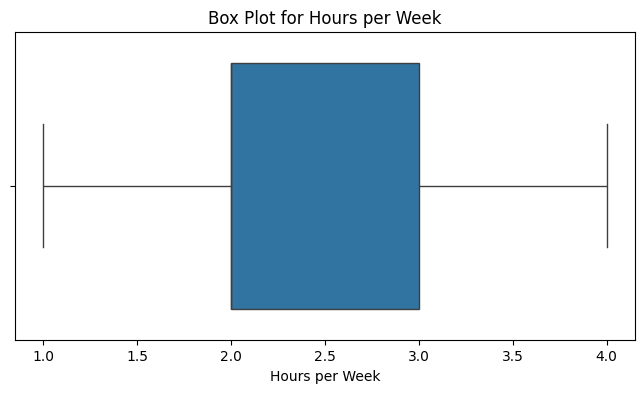

Minutes per Session: 0 outliers


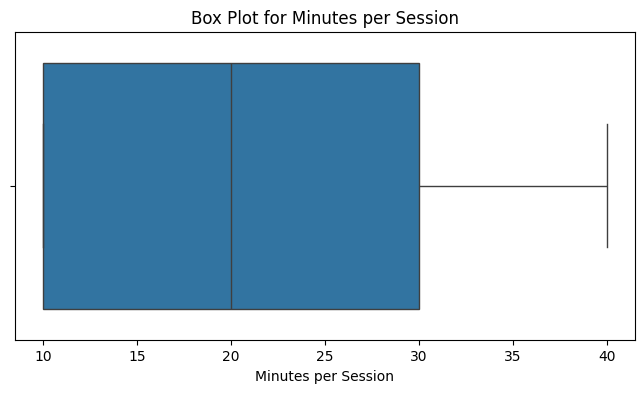

Frequency of Improvement: 0 outliers


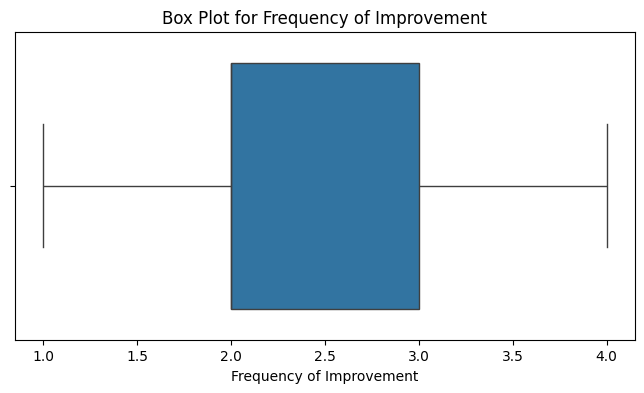

Devices Used: 0 outliers


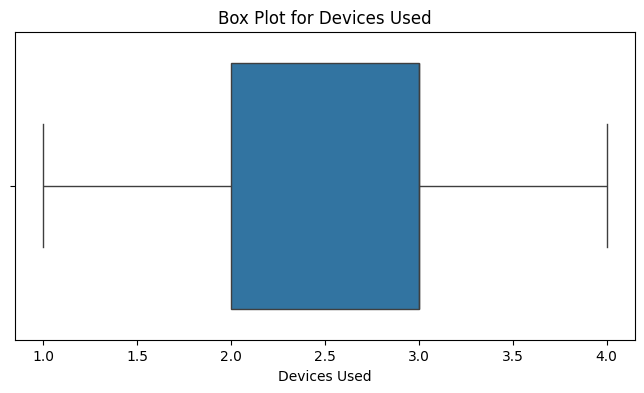

Impact Significance: 0 outliers


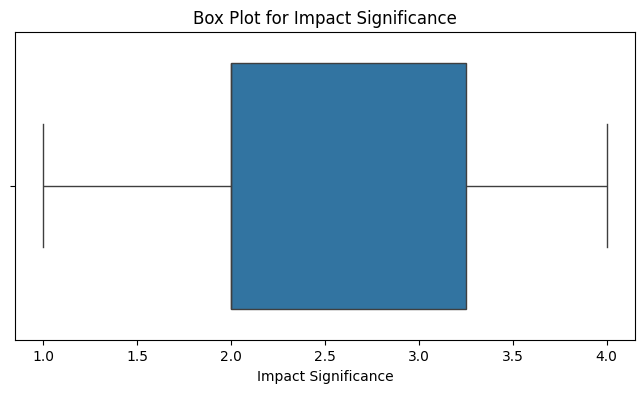

In [ ]:
# Selecting numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("\nOutlier Check using Box Plots and Outlier Counts:")

for col in numerical_cols:
    # Compute IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    num_outliers = outliers.shape[0]

    # Print outlier details
    print(f"{col}: {num_outliers} outliers")

    # Plot box plot
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot for {col}")
    plt.xlabel(col)
    plt.show()

# **Sampling Technique: SMOTE**

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Check column names to ensure 'Role_Both' and 'Role_Coach' exist
print("Columns in df:", df.columns)

# Ensure one-hot encoding for 'Role' is done properly
# This step will create the 'Role_Both' and 'Role_Coach' columns
df = pd.get_dummies(df, columns=['Role'], drop_first=True)

# Define the role columns
role_columns = ['Role_Both', 'Role_Coach']

# Check if the required columns exist before proceeding
if all(col in df.columns for col in role_columns):
    # Combine one-hot encoded 'Role' columns into a single column
    df['Role'] = df[role_columns].idxmax(axis=1).str.replace('Role_', '')
else:
    print("Required columns ('Role_Both' or 'Role_Coach') are missing.")

# Target variable
target_column = 'Role'

# Splitting the data into features and target
X = df.drop(role_columns + [target_column], axis=1)
y = df[target_column]

# Encoding categorical variables in X
X = pd.get_dummies(X, drop_first=True)

# Encoding the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE for Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check class distribution before and after SMOTE
print("Original class distribution:")
print(pd.Series(y_train).value_counts())
print("\nClass distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Columns in df: Index(['Hours per Week', 'Minutes per Session', 'Frequency of Improvement',
       'Devices Used', 'Impact Significance', 'Age Group', 'Gender', 'Role',
       'Frequency of Use', 'Data Types Tracked', 'Devices/Technology Used',
       'Feedback Frequency', 'Coaching Strategies', 'Challenges Faced',
       'Over-reliance on Technology'],
      dtype='object')
Original class distribution:
0    526
1    274
Name: count, dtype: int64

Class distribution after SMOTE:
0    526
1    526
Name: count, dtype: int64


# ** Data Visualizations**

**1. How many hours per week do you spend training or practicing your sport?**

<ipython-input-22-46ab15ca0e87>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.countplot(x='Hours per Week', data=df, palette='viridis')


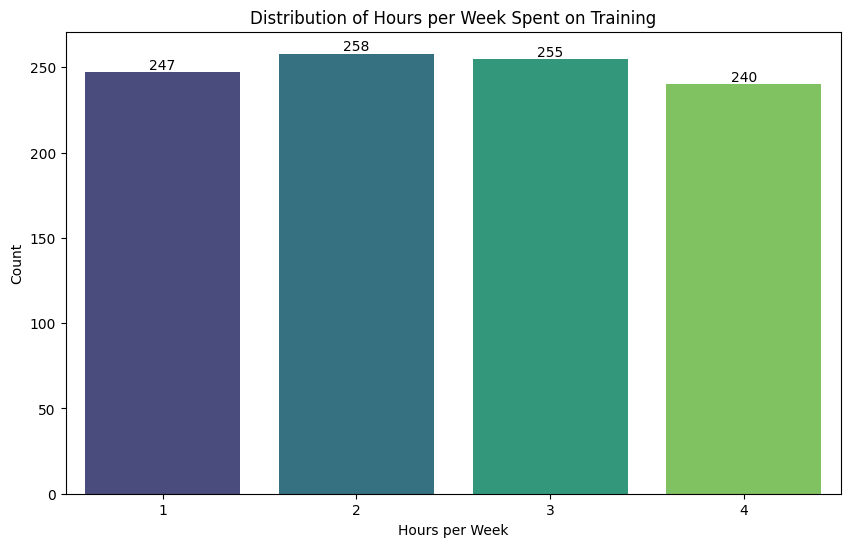

In [ ]:
# Bar plot with changed colors and added labels
plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(x='Hours per Week', data=df, palette='viridis')

# Adding labels on top of bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 5),
                      textcoords='offset points')

# Adding titles and labels
plt.title('Distribution of Hours per Week Spent on Training')
plt.xlabel('Hours per Week')
plt.ylabel('Count')

plt.show()


**2. On average, how many minutes per session do you track real-time data during training?**

Text(0, 0.5, 'Count')

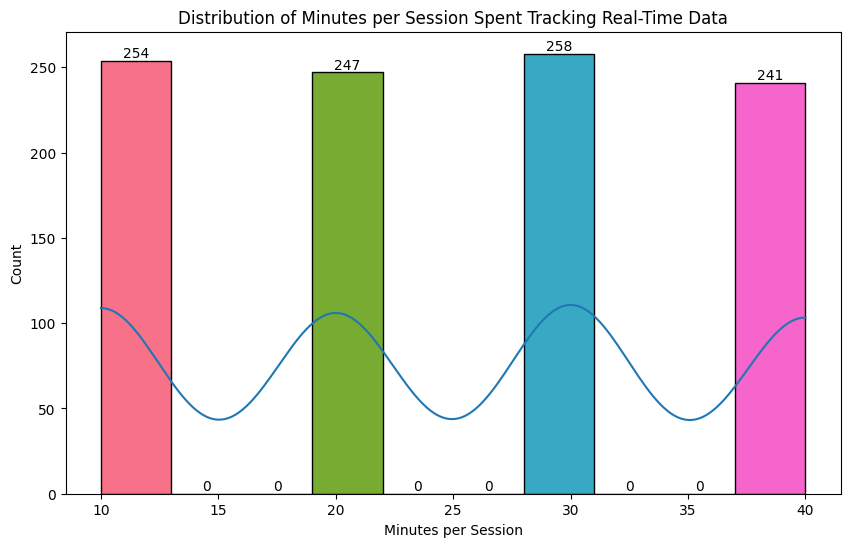

In [ ]:
# Generate a colormap for unique colors for each bar
colors = sns.color_palette('husl', n_colors=10)
# Histogram with labels and different colors for each bar
plt.figure(figsize=(10, 6))
hist_plot = sns.histplot(df['Minutes per Session'], kde=True, bins=10, color=None)

# Apply individual colors to the bars
for i, bar in enumerate(hist_plot.patches):
    bar.set_facecolor(colors[i])  # Assign a unique color to each bar
    # Add labels
    hist_plot.annotate(f'{int(bar.get_height())}',
                       (bar.get_x() + bar.get_width() / 2., bar.get_height()),
                       ha='center', va='center', xytext=(0, 5),
                       textcoords='offset points')

# Adding titles and labels
plt.title('Distribution of Minutes per Session Spent Tracking Real-Time Data')
plt.xlabel('Minutes per Session')
plt.ylabel('Count')

**3. What is the frequency of improvement in athlete performance you have observed after using real-time data?**

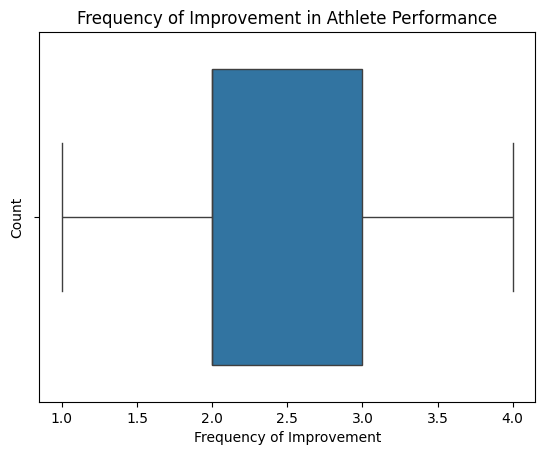

In [ ]:
sns.boxplot(x='Frequency of Improvement', data=df)
plt.title('Frequency of Improvement in Athlete Performance')
plt.xlabel('Frequency of Improvement')
plt.ylabel('Count')
plt.show()


**4. What is your age group?**

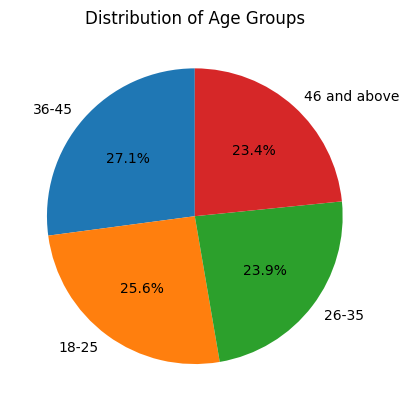

In [ ]:
age_group_counts = df['Age Group'].value_counts()
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Age Groups')
plt.show()


**5. How frequently do you use real-time data for training or performance analysis?**

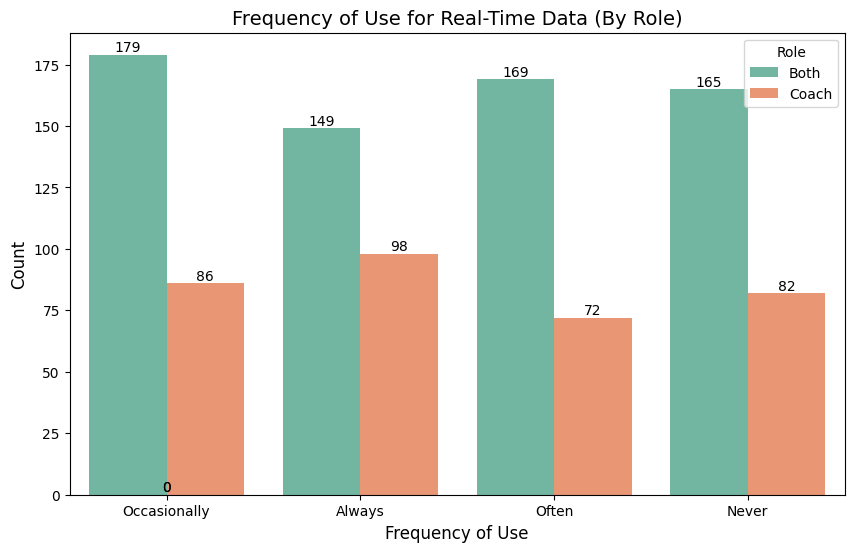

In [ ]:
if 'Frequency of Use' not in df.columns or 'Role' not in df.columns:
    print("Required columns 'Frequency of Use' or 'Role' are missing in the dataframe.")
else:
    # Create the countplot with hue
    plt.figure(figsize=(10, 6))
    count_plot = sns.countplot(x='Frequency of Use', data=df, hue='Role', palette='Set2')

    # Add labels on top of each bar
    for p in count_plot.patches:
        count_plot.annotate(f'{int(p.get_height())}',
                            (p.get_x() + p.get_width() / 2., p.get_height()),
                            ha='center', va='center', xytext=(0, 5),
                            textcoords='offset points', fontsize=10)

    # Add titles and axis labels
    plt.title('Frequency of Use for Real-Time Data (By Role)', fontsize=14)
    plt.xlabel('Frequency of Use', fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Adjust legend
    plt.legend(title='Role', loc='upper right', fontsize=10)

    plt.show()

In [ ]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

# Check if there are any missing values
df.fillna(df.mean(), inplace=True)

# Define the target variable
X = df.drop(['Role_Both'], axis=1)  # Features (removing the target column)
y = df['Role_Both']  # Target (predicting 'Role_Both' column)

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



# **ROC Curve**

Logistic Regression ROC-AUC: 0.7655
Random Forest ROC-AUC: 0.7418


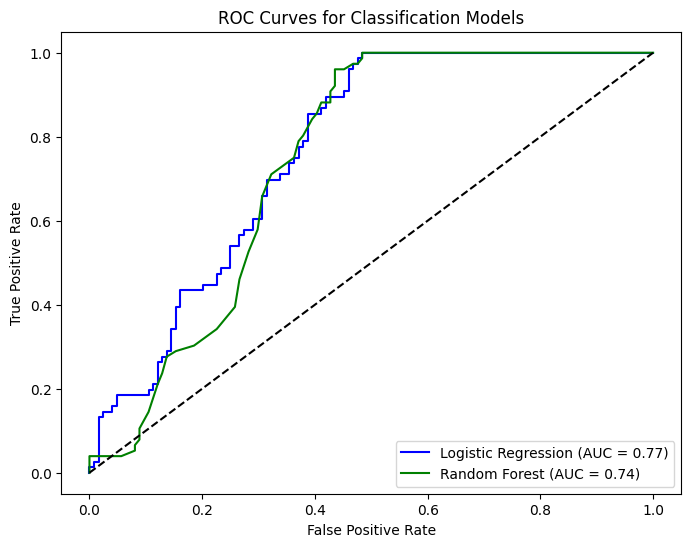

In [ ]:
# Train a Logistic Regression Classifier
log_reg = LogisticRegression(random_state=42, max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate Logistic Regression
y_pred_log_reg = log_reg.predict(X_test)
y_pred_log_reg_proba = log_reg.predict_proba(X_test)[:, 1]
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_roc_auc = roc_auc_score(y_test, y_pred_log_reg_proba)

# Train a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predict and evaluate Random Forest
y_pred_rf = rf_clf.predict(X_test)
y_pred_rf_proba = rf_clf.predict_proba(X_test)[:, 1]
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_roc_auc = roc_auc_score(y_test, y_pred_rf_proba)

# Print model comparisons
print(f"Logistic Regression ROC-AUC: {log_reg_roc_auc:.4f}")
print(f"Random Forest ROC-AUC: {rf_roc_auc:.4f}")

# Plot ROC Curve for Logistic Regression and Random Forest
plt.figure(figsize=(8, 6))

# Logistic Regression ROC Curve
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_log_reg_proba)
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label=f'Logistic Regression (AUC = {log_reg_roc_auc:.2f})')

# Random Forest ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
plt.plot(fpr_rf, tpr_rf, color='green', label=f'Random Forest (AUC = {rf_roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.title("ROC Curves for Classification Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.show()

# **Creation of Classification Model**

**1. Logistic Regression (Classification)**

In [ ]:
# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluation Metrics
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

# Print Classification Report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# Print Accuracy and AUC
print("Logistic Regression Accuracy:", log_reg_accuracy)
print("Logistic Regression AUC:", log_reg_auc)


Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.75      0.69      0.72       124
        True       0.56      0.63      0.59        76

    accuracy                           0.67       200
   macro avg       0.66      0.66      0.66       200
weighted avg       0.68      0.67      0.67       200

Logistic Regression Accuracy: 0.67
Logistic Regression AUC: 0.7654923599320883


**Random Forest Classifier Model**

In [ ]:
# Random Forest Classifier Model
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluation Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:, 1])

# Print Classification Report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Print Accuracy and AUC
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest AUC:", rf_auc)


Random Forest Classification Report:
              precision    recall  f1-score   support

       False       0.73      0.70      0.72       124
        True       0.54      0.58      0.56        76

    accuracy                           0.66       200
   macro avg       0.64      0.64      0.64       200
weighted avg       0.66      0.66      0.66       200

Random Forest Accuracy: 0.655
Random Forest AUC: 0.7417763157894737


**Classification model comparison**

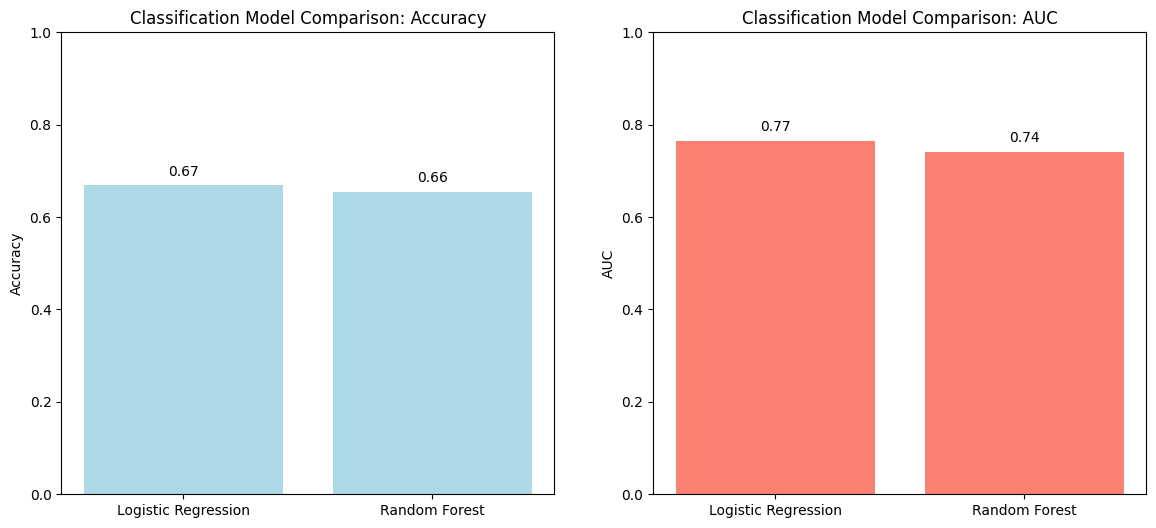

In [ ]:
# Collecting accuracy and performance results for classification models
classification_models = ['Logistic Regression', 'Random Forest']
classification_accuracies = [log_reg_accuracy, rf_accuracy]
classification_auc_scores = [log_reg_auc, rf_auc]

# Plot comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Classification Comparison (Accuracy)
ax[0].bar(classification_models, classification_accuracies, color='lightblue', label='Accuracy')
ax[0].set_title('Classification Model Comparison: Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0, 1)
for i, v in enumerate(classification_accuracies):
    ax[0].text(i, v + 0.02, f"{v:.2f}", ha='center')

# Classification Comparison (AUC)
ax[1].bar(classification_models, classification_auc_scores, color='salmon', label='AUC')
ax[1].set_title('Classification Model Comparison: AUC')
ax[1].set_ylabel('AUC')
ax[1].set_ylim(0, 1)
for i, v in enumerate(classification_auc_scores):
    ax[1].text(i, v + 0.02, f"{v:.2f}", ha='center')  # Add labels above bars

plt.show()


# **Creation of Regression Model**

**Linear Regression Model**

In [ ]:
# Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)  # Train the model

# Predictions
y_pred_lin_reg = lin_reg.predict(X_test)

# Calculate Evaluation Metrics for Linear Regression
lin_reg_mse = mean_squared_error(y_test, y_pred_lin_reg)
lin_reg_r2 = r2_score(y_test, y_pred_lin_reg)

# Print Evaluation Metrics for Linear Regression
print("Linear Regression Evaluation Metrics:")
print("Mean Squared Error (MSE):", lin_reg_mse)
print("R-squared (R2):", lin_reg_r2)

Linear Regression Evaluation Metrics:
Mean Squared Error (MSE): 0.1712733981887668
R-squared (R2): 0.27303311464869784


**Decision Tree regression Model**

In [ ]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_dt_reg = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions with the best model
y_pred_dt_reg = best_dt_reg.predict(X_test)

# Evaluate the improved model
dt_reg_mse = mean_squared_error(y_test, y_pred_dt_reg)
dt_reg_r2 = r2_score(y_test, y_pred_dt_reg)

print("Optimized Decision Tree Regressor Evaluation Metrics:")
print("Mean Squared Error (MSE):", dt_reg_mse)
print("R-squared (R2):", dt_reg_r2)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimized Decision Tree Regressor Evaluation Metrics:
Mean Squared Error (MSE): 0.1747716204829312
R-squared (R2): 0.2581849724833142


**Regression Models Comparison**

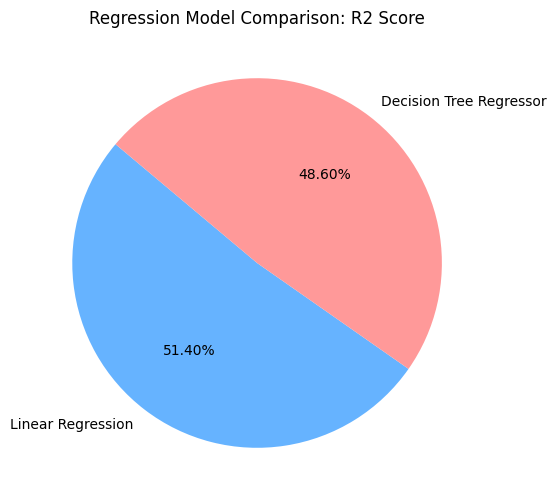

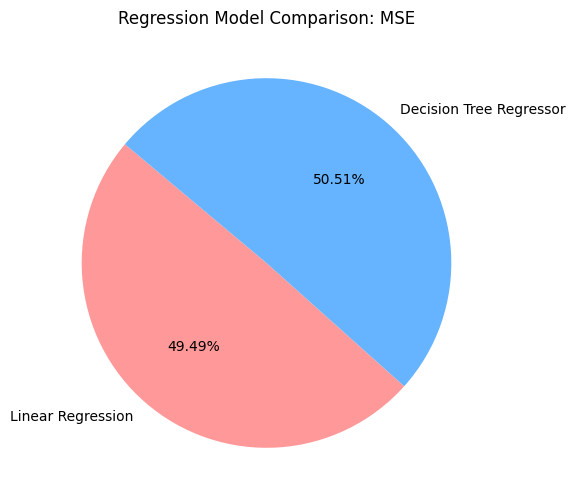

In [ ]:
# Regression models and their scores
regression_models = ['Linear Regression', 'Decision Tree Regressor']
regression_r2_scores = [max(lin_reg_r2, 0), max(dt_reg_r2, 0)]
regression_mse_scores = [max(lin_reg_mse, 0), max(dt_reg_mse, 0)]

# Pie chart for R2 Score comparison
plt.figure(figsize=(8, 6))

# R2 Score Pie Chart
plt.pie(regression_r2_scores, labels=regression_models, autopct='%1.2f%%', startangle=140, colors=['#66b3ff', '#ff9999'])
plt.title('Regression Model Comparison: R2 Score')
plt.show()

# Pie chart for MSE comparison
plt.figure(figsize=(8, 6))

# MSE Pie Chart
plt.pie(regression_mse_scores, labels=regression_models, autopct='%1.2f%%', startangle=140, colors=['#ff9999', '#66b3ff'])
plt.title('Regression Model Comparison: MSE')
plt.show()


# **Creation of Unsupervised Clustering Models**

 **K-Means Clustering Model**

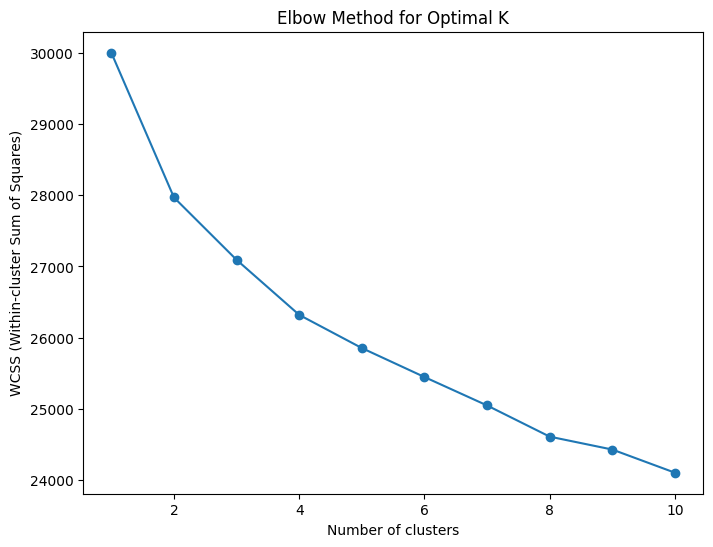

Silhouette Score: 0.051681210821715


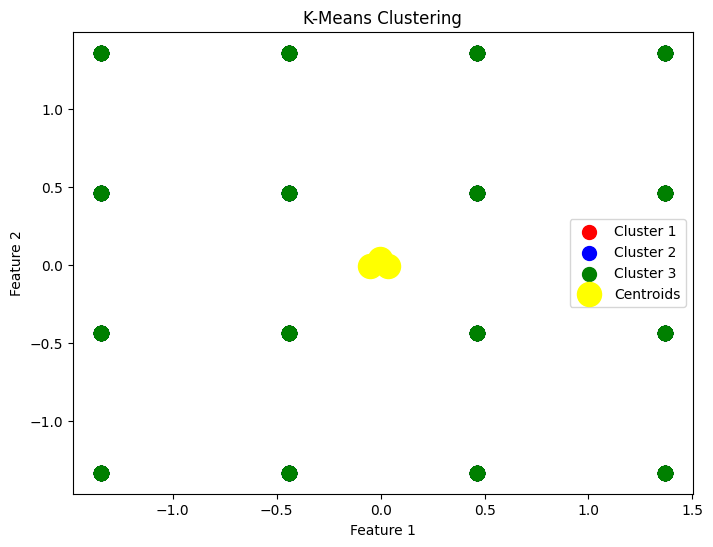

In [ ]:

# Scaling the data before applying K-Means
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

# Based on the elbow graph, choose the optimal k
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Calculate Silhouette Score
sil_score = silhouette_score(X_scaled, y_kmeans)
print(f'Silhouette Score: {sil_score}')

# Visualizing the clusters (for 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


**unsupervised Hierarchical Clustering**

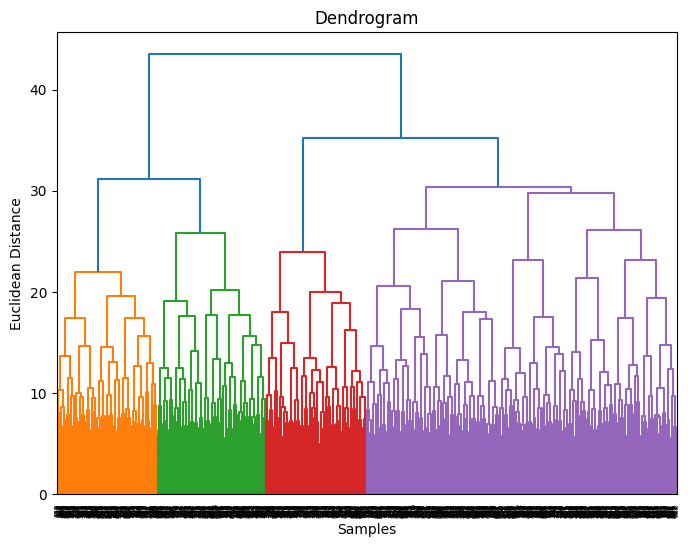

Silhouette Score: 0.025117049375923652


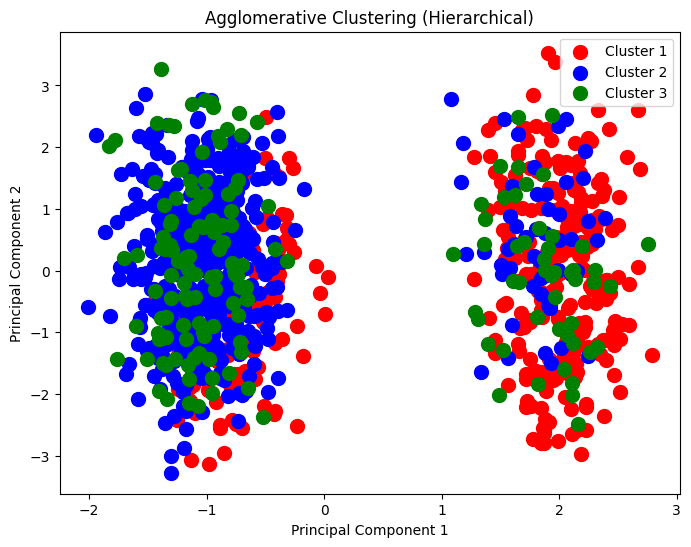

In [ ]:
# Scaling the data before applying Hierarchical Clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dendrogram to determine the optimal number of clusters
plt.figure(figsize=(8, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# Based on the dendrogram, choose the optimal number of clusters (e.g., 3)
agg_clust = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_agg = agg_clust.fit_predict(X_scaled)

# Calculate the Silhouette Score
sil_score = silhouette_score(X_scaled, y_agg)
print(f'Silhouette Score: {sil_score}')

# Visualizing the clusters (for 2D data, after applying PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[y_agg == 0, 0], X_pca[y_agg == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_pca[y_agg == 1, 0], X_pca[y_agg == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_pca[y_agg == 2, 0], X_pca[y_agg == 2, 1], s=100, c='green', label='Cluster 3')
plt.title('Agglomerative Clustering (Hierarchical)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


**unsupervised Clustering model comparison**

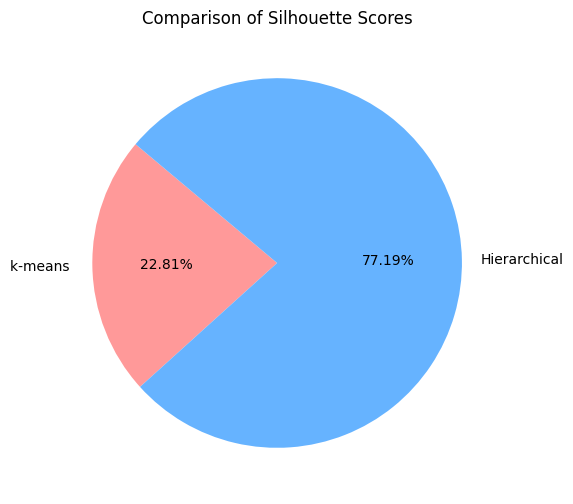

In [ ]:
# Silhouette scores for the two models
sil_score_1 = 0.016684918325861206
sil_score_2 = 0.056473715365412895

# Labels for the pie chart
labels = ['k-means ', 'Hierarchical']

# Values for the pie chart
scores = [sil_score_1, sil_score_2]

# Plotting the Pie chart
plt.figure(figsize=(6, 6))
plt.pie(scores, labels=labels, autopct='%1.2f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Comparison of Silhouette Scores')
plt.show()


**Correlation Matrix Heatmap**

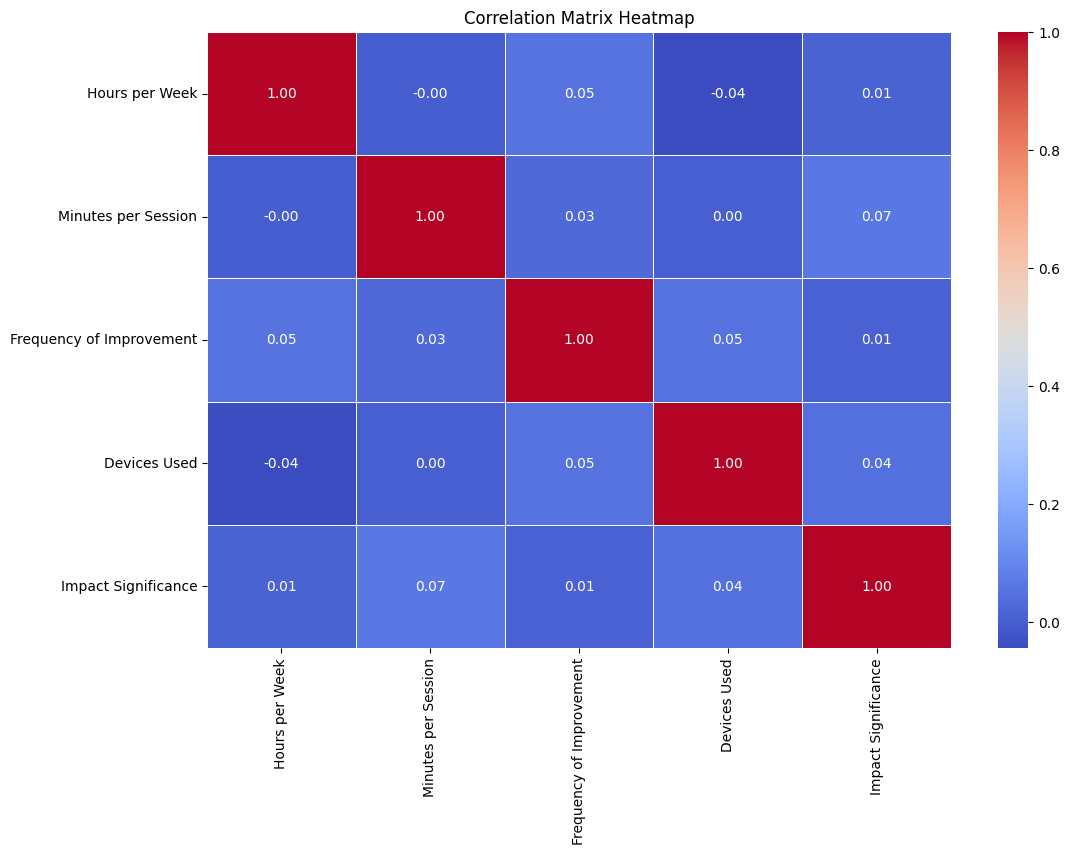

In [ ]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numeric features
corr_matrix = numeric_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()